In [1]:
#Q1.predict delivery time using sorting time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 
from scipy import stats
import numpy as np


In [2]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time.csv


In [3]:
delivery=pd.read_csv("delivery_time.csv")
delivery.head()

Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10

In [4]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
#to check no of missing value
delivery.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
delivery.corr()

Delivery Time  Sorting Time
Delivery Time       1.000000      0.825997
Sorting Time        0.825997      1.000000

<ipython-input-7-fd10aded87bb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delivery['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

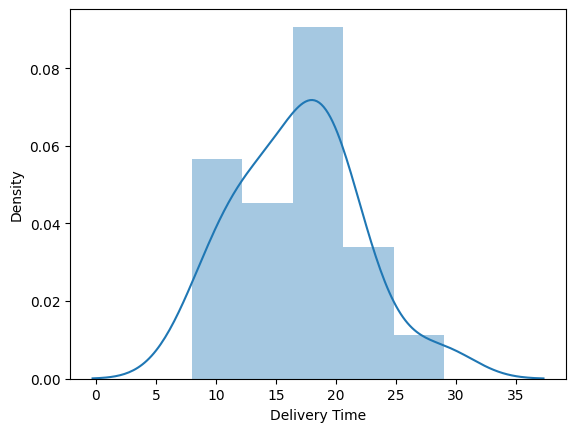

In [7]:
sns.distplot(delivery['Delivery Time'])

<ipython-input-8-bc76fa8d8dd7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delivery['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

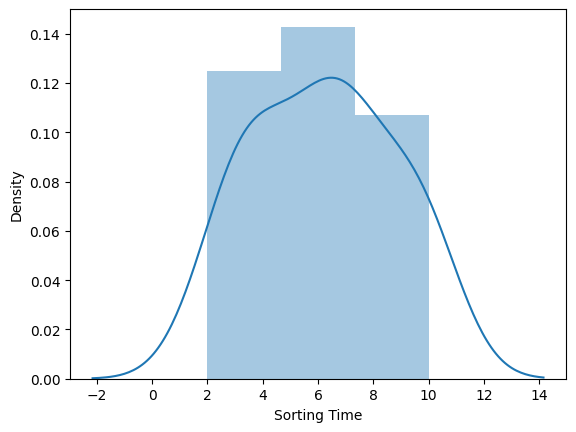

In [ ]:
sns.distplot(delivery['Sorting Time'])

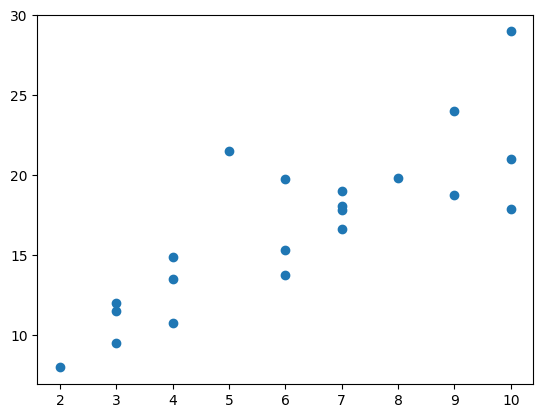

In [8]:
plt.scatter(x=delivery['Sorting Time'],y=delivery['Delivery Time'])

In [9]:
delivery=delivery.rename({'Delivery Time':'DeliveryTime','Sorting Time':'SortingTime'},axis=1)

In [10]:
import statsmodels.formula.api as smf
model = smf.ols('DeliveryTime~SortingTime',data=delivery).fit()


<Axes: xlabel='SortingTime', ylabel='DeliveryTime'>

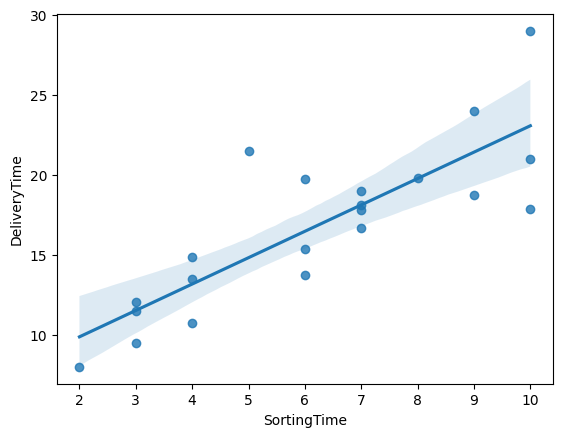

In [11]:
sns.regplot(x="SortingTime",y="DeliveryTime",data=delivery)

In [12]:
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [13]:
print(model.tvalues,'\n',model.pvalues)

Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [14]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

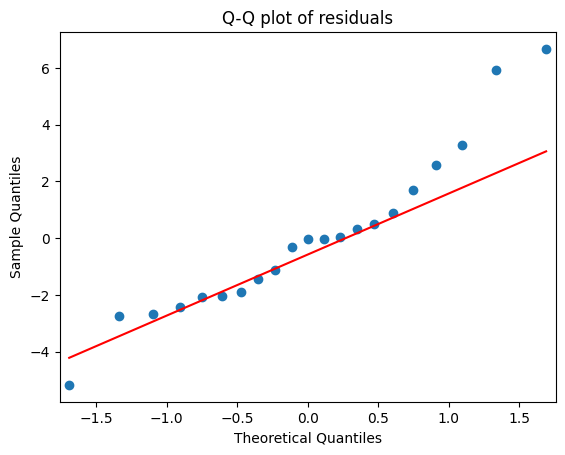

In [15]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title('Q-Q plot of residuals')
plt.show()

In [16]:
#sqrt transformation
delivery1=pd.merge(np.sqrt(delivery['SortingTime']).reset_index(),delivery['DeliveryTime'].reset_index())
delivery1.drop('index',axis=1)

SortingTime  DeliveryTime
0      3.162278         21.00
1      2.000000         13.50
2      2.449490         19.75
3      3.000000         24.00
4      3.162278         29.00
5      2.449490         15.35
6      2.645751         19.00
7      1.732051          9.50
8      3.162278         17.90
9      3.000000         18.75
10     2.828427         19.83
11     2.000000         10.75
12     2.645751         16.68
13     1.732051         11.50
14     1.732051         12.03
15     2.000000         14.88
16     2.449490         13.75
17     2.645751         18.11
18     1.414214          8.00
19     2.645751         17.83
20     2.236068         21.50

In [17]:
model1 = smf.ols('DeliveryTime~SortingTime',data=delivery1).fit()

<Axes: xlabel='SortingTime', ylabel='DeliveryTime'>

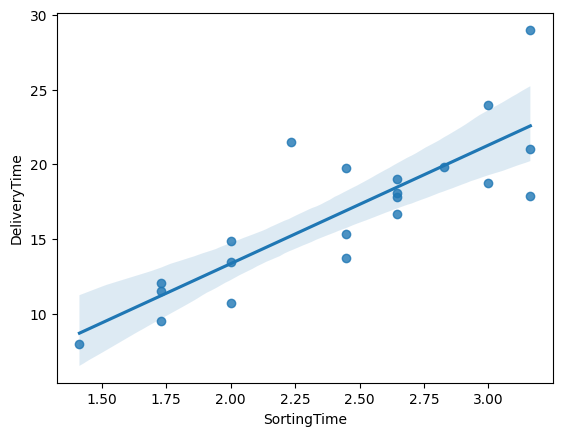

In [18]:
sns.regplot(x="SortingTime",y="DeliveryTime",data=delivery1)

In [19]:
model1.params

Intercept     -2.518837
SortingTime    7.936591
dtype: float64

In [20]:
print(model1.tvalues,'\n',model1.pvalues)

Intercept     -0.840911
SortingTime    6.592434
dtype: float64 
 Intercept      0.410857
SortingTime    0.000003
dtype: float64


In [21]:
(model1.rsquared,model1.rsquared_adj)

(0.695806227630867, 0.6797960290851232)

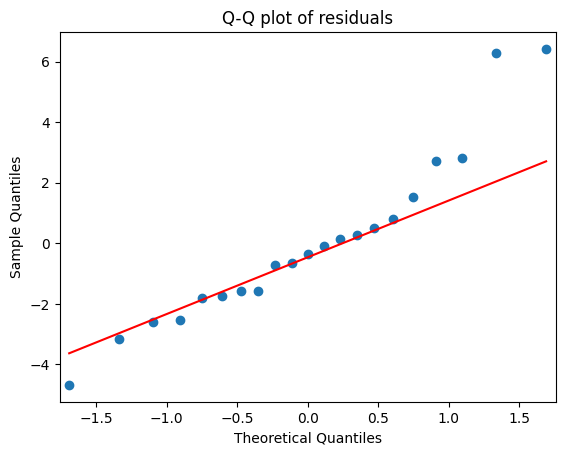

In [22]:
qqplot1 = sm.qqplot(model1.resid,line='q')
plt.title('Q-Q plot of residuals')
plt.show()

In [23]:
#data prediction
y=model1.predict(delivery1['SortingTime'])
y

0     22.578867
1     13.354345
2     16.921761
3     21.290936
4     22.578867
5     16.921761
6     18.479409
7     11.227742
8     22.578867
9     21.290936
10    19.929232
11    13.354345
12    18.479409
13    11.227742
14    11.227742
15    13.354345
16    16.921761
17    18.479409
18     8.705198
19    18.479409
20    15.227920
dtype: float64

In [24]:

delivery2=pd.merge(delivery.reset_index(),y.reset_index())
delivery2=delivery2.drop('index',axis=1)
delivery2.columns=['DeliveryTime','SortingTime','Predicted DeliveryTime']
print(delivery2)

    DeliveryTime  SortingTime  Predicted DeliveryTime
0          21.00           10               22.578867
1          13.50            4               13.354345
2          19.75            6               16.921761
3          24.00            9               21.290936
4          29.00           10               22.578867
5          15.35            6               16.921761
6          19.00            7               18.479409
7           9.50            3               11.227742
8          17.90           10               22.578867
9          18.75            9               21.290936
10         19.83            8               19.929232
11         10.75            4               13.354345
12         16.68            7               18.479409
13         11.50            3               11.227742
14         12.03            3               11.227742
15         14.88            4               13.354345
16         13.75            6               16.921761
17         18.11            

In [25]:
newdata=pd.Series([4,6,8,10])
delivery3=pd.DataFrame(newdata,columns=['SortingTime'])
delivery3

SortingTime
0            4
1            6
2            8
3           10

In [26]:
model.predict(delivery3)

0    13.178814
1    16.476853
2    19.774893
3    23.072933
dtype: float64

In [27]:
model1.predict(delivery3)

0    29.227526
1    45.100708
2    60.973889
3    76.847071
dtype: float64

In [ ]:
#Q.2 salery_hike ->  build prediction model for salery hike

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import numpy as np

In [29]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [30]:
sal=pd.read_csv("Salary_Data.csv")
sal.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [31]:
sal.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<ipython-input-32-5a329d40937b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sal['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

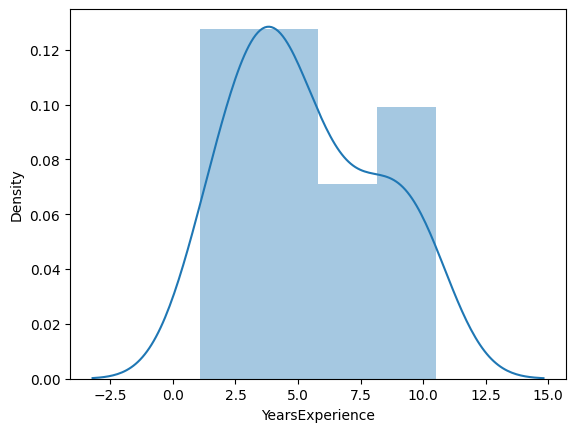

In [32]:
sns.distplot(sal['YearsExperience'])

<ipython-input-47-1678b393937a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sal['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

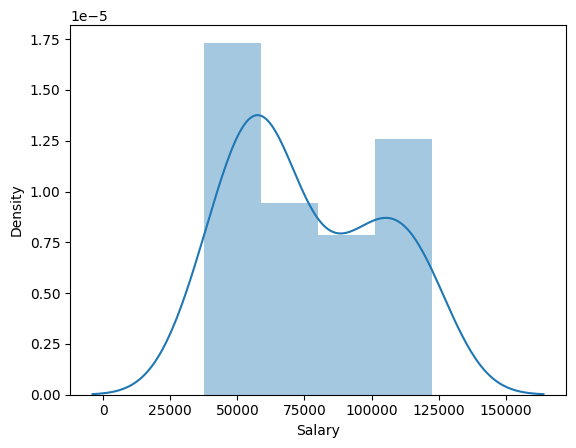

In [ ]:
sns.distplot(sal['Salary'])

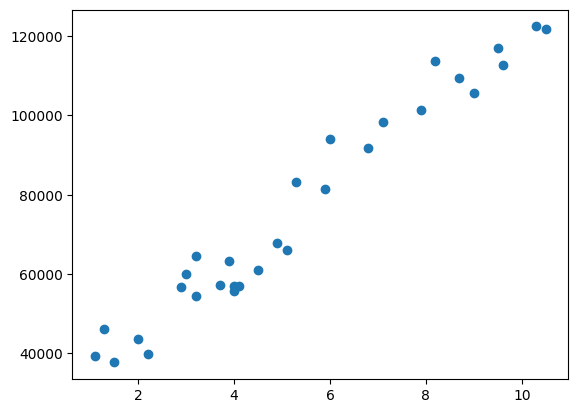

In [33]:
plt.scatter(sal['YearsExperience'],sal['Salary'])

In [34]:
sal.corr()

YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000

In [35]:
import statsmodels.formula.api as smf
model = smf.ols('Salary~YearsExperience',data=sal).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

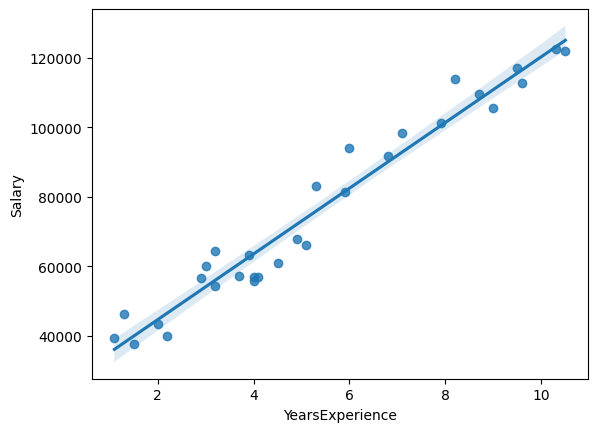

In [36]:
sns.regplot(x='YearsExperience',y='Salary',data=sal)

In [37]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [38]:
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [39]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

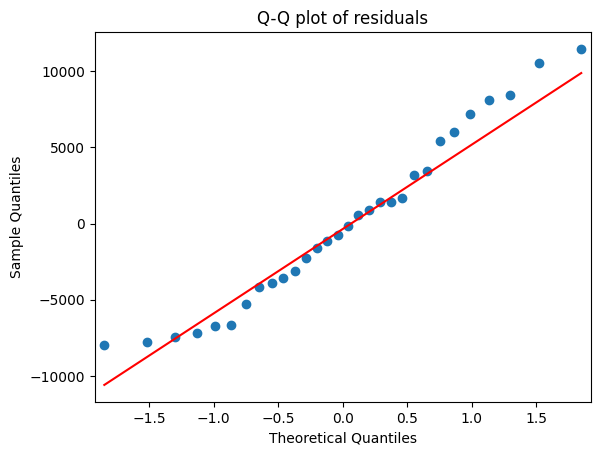

In [40]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.title('Q-Q plot of residuals')
plt.show()

In [41]:
#predict salary
y1=model.predict(sal['YearsExperience'])
sal2=pd.merge(sal.reset_index(),y1.reset_index())
sal2=sal2.drop('index',axis=1)
sal2.columns=['YearsExperience','Salary','Predicted Salary']
sal2

YearsExperience    Salary  Predicted Salary
0               1.1   39343.0      36187.158752
1               1.3   46205.0      38077.151217
2               1.5   37731.0      39967.143681
3               2.0   43525.0      44692.124842
4               2.2   39891.0      46582.117306
5               2.9   56642.0      53197.090931
6               3.0   60150.0      54142.087163
7               3.2   54445.0      56032.079627
8               3.2   64445.0      56032.079627
9               3.7   57189.0      60757.060788
10              3.9   63218.0      62647.053252
11              4.0   55794.0      63592.049484
12              4.0   56957.0      63592.049484
13              4.1   57081.0      64537.045717
14              4.5   61111.0      68317.030645
15              4.9   67938.0      72097.015574
16              5.1   66029.0      73987.008038
17              5.3   83088.0      75877.000502
18              5.9   81363.0      81546.977895
19              6.0   93940.0      82491.974127
20              6.8   91738.0      90051.943985
21              7.1   98273.0      92886.932681
22              7.9  101302.0     100446.902538
23              8.2  113812.0     103281.891235
24              8.7  109431.0     108006.872395
25              9.0  105582.0     110841.861092
26              9.5  116969.0     115566.842252
27              9.6  112635.0     116511.838485
28             10.3  122391.0     123126.812110
29             10.5  121872.0     125016.804574

In [42]:
newdata1=pd.Series([2.1,3.5,5.7,7.3,10.6])
sal3=pd.DataFrame(newdata1,columns=['YearsExperience'])
sal3

YearsExperience
0              2.1
1              3.5
2              5.7
3              7.3
4             10.6

In [43]:
y2=model.predict(sal3)
print(y2)

0     45637.121074
1     58867.068324
2     79656.985431
3     94776.925145
4    125961.800806
dtype: float64
